In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


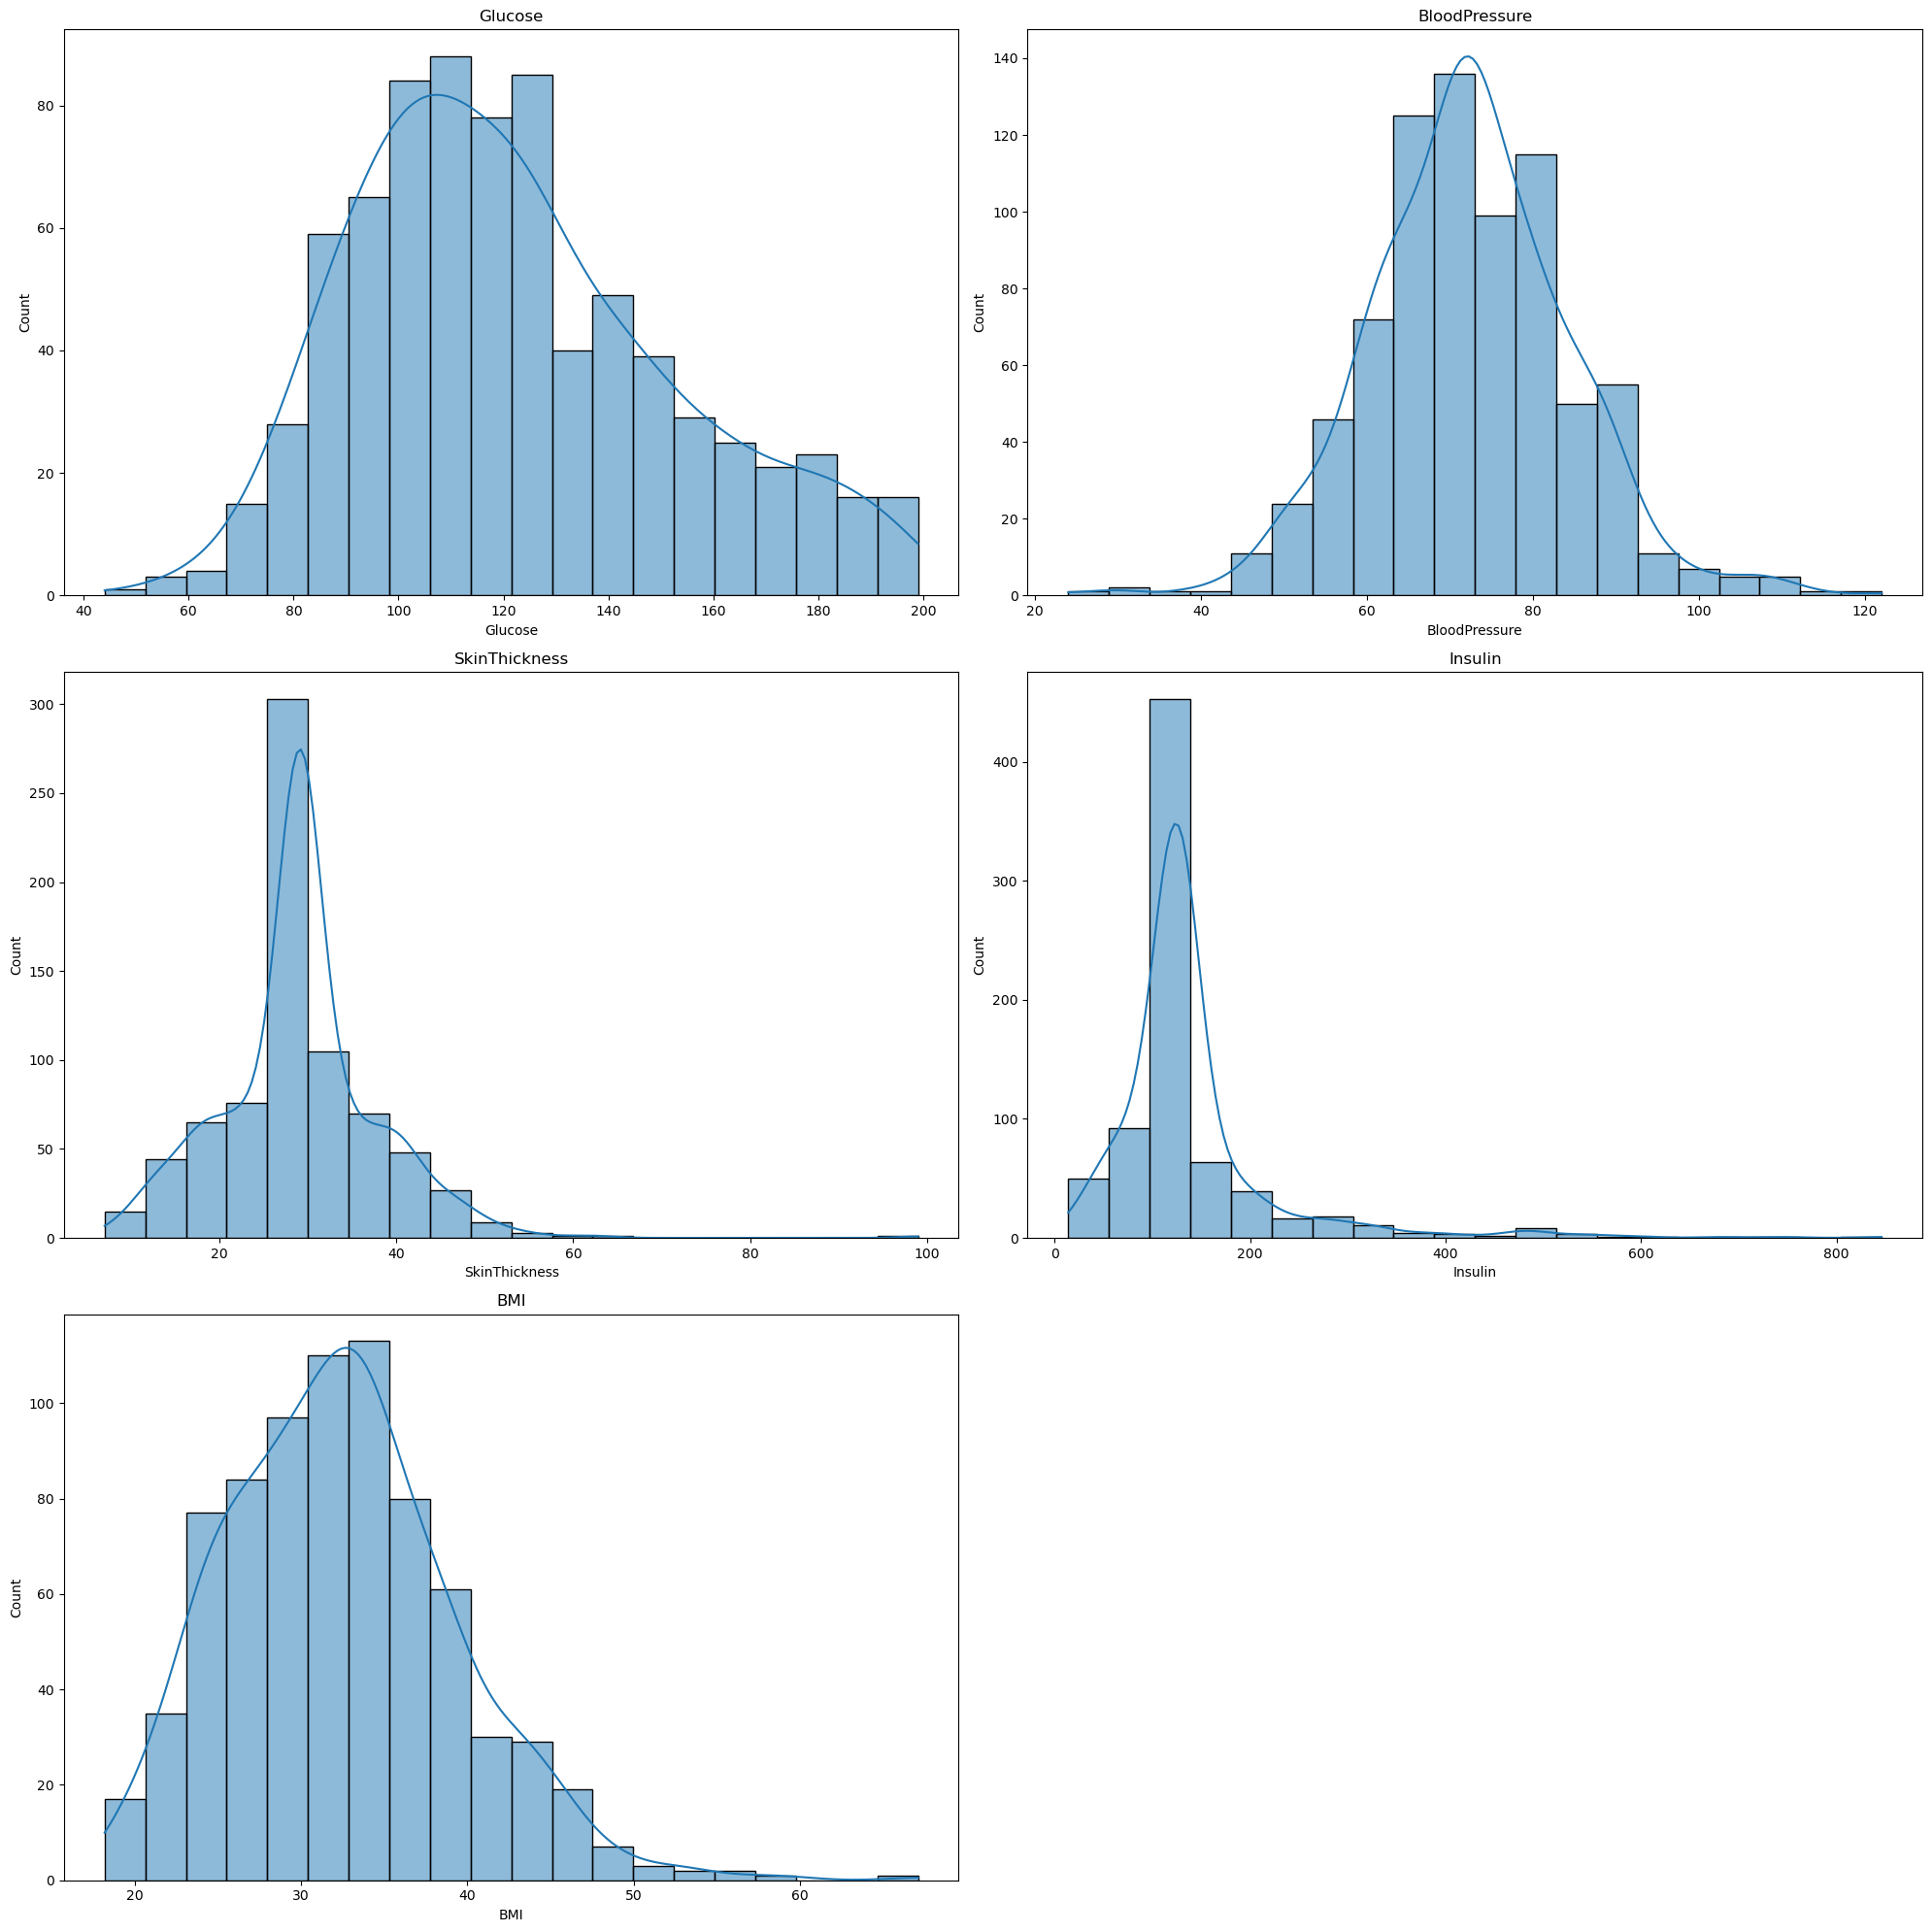

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing data
data_copy = data.copy(deep=True)


columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_copy[columns_to_replace] = data_copy[columns_to_replace].replace(0, np.NaN)

median_fill = data_copy.median()
data_copy.fillna(median_fill, inplace=True)

plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_replace, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data_copy[column], bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()
data=data_copy

In [13]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [14]:
import pandas as pd
# The correlation between variables and outcomes
selected_features = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Outcome']
data_subset = data[selected_features]

# calculate Outcome correlation 
correlations = data_subset.corr()['Outcome'].abs()
sorted_features = correlations.sort_values(ascending=False)
print(sorted_features)


Outcome          1.000000
Glucose          0.492782
BMI              0.312038
Age              0.238356
Pregnancies      0.221898
SkinThickness    0.214873
Insulin          0.203790
Name: Outcome, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

# not include DiabetesPedigreeFunction' and 'BloodPressure'
selected_features = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']

X = data[selected_features]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

perceptron = Perceptron(max_iter=1000, tol=1e-1)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 68.40%


In [16]:
#Separate data into training and testing
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# training 
perceptron = Perceptron(max_iter=1000, tol=1e-1)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Accuracy: 70.13%
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       151
           1       0.61      0.39      0.47        80

    accuracy                           0.70       231
   macro avg       0.67      0.63      0.63       231
weighted avg       0.69      0.70      0.68       231



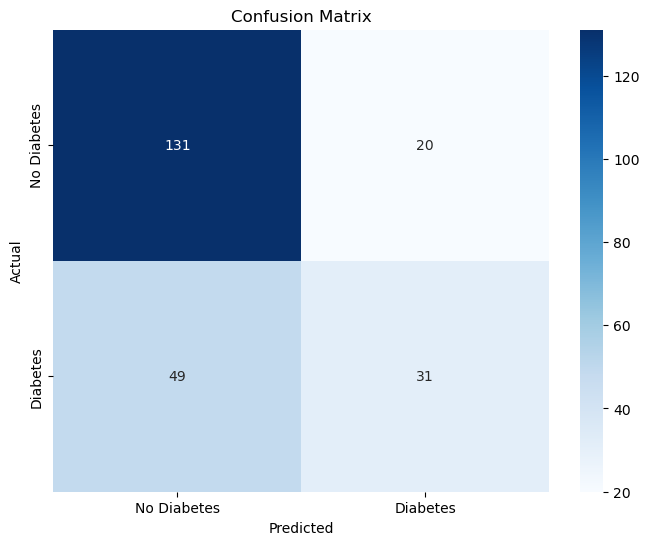

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Use Seaborn to draw confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [18]:


# 使用L2正则化
perceptron = Perceptron(max_iter=1000, tol=1e-1, penalty='l2', alpha=0.0001)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with L2 regularization: {accuracy * 100:.2f}%")


Accuracy with L2 regularization: 75.76%


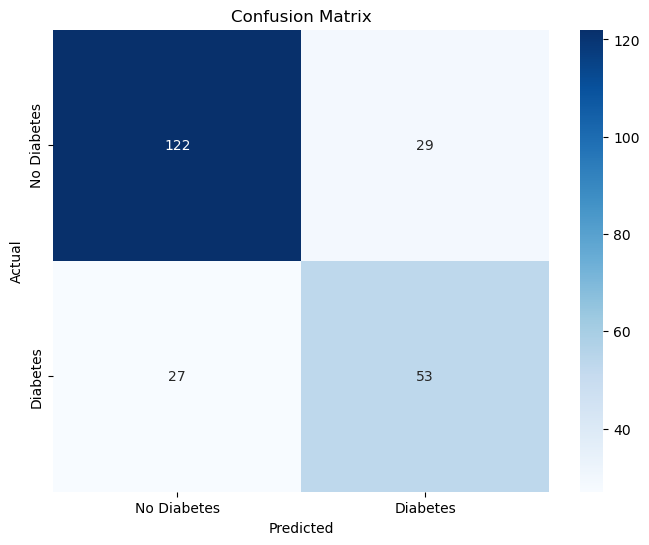

In [19]:



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()